In [1]:
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST-1871742707-res/'
p_707 = pd.read_csv(output_path + 'ST-1871742707_1.0.csv')

p_707.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'cig',
       'mood', 'tense', 'tired', 'period', 'rumination', 'socialize',
       'socialize_val', 'sport_time', 'work_time', 'day_sleep', 'phq_1',
       'phq_2'],
      dtype='object')

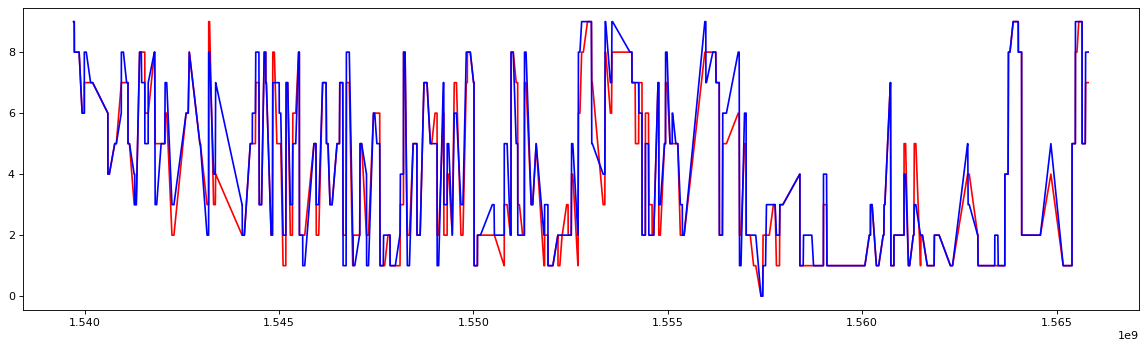

In [2]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p_707[['time']]
yaxis = p_707[['phq_1']]
yaxis2 = p_707[['phq_2']]
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [4]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [5]:
train_set, test_set = train_test_split(p_707, test_size=0.25, random_state=42, shuffle=False)

In [6]:
X_train = train_set.loc[:,'accX':'day_sleep']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'day_sleep']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [7]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep
0,2.34,3.52,-2.90,4.19,2.65,4.19,-1.43,82.50,0.31,41.64,...,2,3,3,0,8,23,81,95,0,0
1,4.36,4.74,-4.58,3.53,-1.59,3.53,-1.05,77.83,1.89,58.35,...,2,3,3,0,8,23,81,95,0,0
2,2.99,5.40,-6.32,4.28,0.48,4.28,-0.50,96.74,0.23,65.56,...,2,3,3,0,8,23,81,95,0,0
3,4.92,4.19,-5.86,4.15,0.95,4.15,0.02,80.78,-1.10,62.23,...,2,3,3,0,8,23,81,95,0,0
4,-6.47,2.59,-6.80,2.64,-1.51,2.64,0.11,27.43,0.40,16.76,...,2,3,3,0,8,23,81,95,0,0


In [8]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [9]:
y_pred_1 = rnd_reg.predict(X_train)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.38545877227415487

In [11]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

3.4393001677925086

In [12]:

forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [1.48199428 1.69423339 1.33515007 1.35256583 1.07536454 0.7164123
 0.96392331 1.14131528 1.15260614 0.79867985]
Mean: 1.1712244992740328
std dev: 0.28790974291531746
